In [45]:
!pip install pycaret

In [46]:
# display interactive visuals
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [47]:
# get data
from pycaret.datasets import get_data
import pandas as pd

df = pd.read_csv('kr-vs-kp.csv')

# add index to data
df.reset_index(drop=True, inplace=True)
df

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd,hdchk,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,t,f,f,f,f,f,t,f,f,f,f,t,l,f,b,f,f,t,f,f,f,f,t,t,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,f,t,l,f,b,f,f,t,f,f,f,f,t,f,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,f,f,f,f,t,f,f,f,f,t,l,f,n,f,f,t,f,f,f,f,t,f,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3194,t,f,t,f,f,f,t,f,f,f,f,t,l,t,b,t,f,t,f,f,f,f,f,t,f,t,f,f,t,f,f,t,f,f,f,n,nowin


In [48]:
#check the shape of data
df.shape

(3196, 37)

In [49]:
# create unseen data for predictions
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2876, 37)
Unseen Data For Predictions: (320, 37)


In [50]:
# initialize the environment in pycaret and create the transformation pipeline to prepare the data for modeling and deployment
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'class', session_id=123) 

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,"nowin: 0, won: 1"
4,Original Data,"(2876, 37)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


In [51]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9930,0.9929,0.9962,0.9905,0.9933,0.9861,0.9861,0.021
lightgbm,Light Gradient Boosting Machine,0.9915,0.9996,0.9933,0.9904,0.9918,0.9831,0.9831,0.071
et,Extra Trees Classifier,0.9891,0.9975,0.9894,0.9895,0.9894,0.9781,0.9782,0.512
rf,Random Forest Classifier,0.9876,0.9982,0.9894,0.9866,0.9880,0.9751,0.9752,0.511
gbc,Gradient Boosting Classifier,0.9811,0.9981,0.9750,0.9884,0.9816,0.9622,0.9625,0.199
ada,Ada Boost Classifier,0.9662,0.9950,0.9711,0.9639,0.9674,0.9324,0.9327,0.133
lr,Logistic Regression,0.9593,0.9928,0.9634,0.9583,0.9607,0.9184,0.9187,0.053
svm,SVM - Linear Kernel,0.9553,0.0000,0.9471,0.9668,0.9560,0.9106,0.9122,0.025
knn,K Neighbors Classifier,0.9409,0.9793,0.9577,0.9303,0.9436,0.8815,0.8822,0.125
lda,Linear Discriminant Analysis,0.9359,0.9842,0.9596,0.9202,0.9393,0.8715,0.8727,0.027


In [52]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9901,0.9898,1.0000,0.9811,0.9905,0.9802,0.9804
2,0.9950,0.9949,1.0000,0.9905,0.9952,0.9901,0.9901
3,0.9801,0.9801,0.9808,0.9808,0.9808,0.9602,0.9602
4,0.9950,0.9948,1.0000,0.9905,0.9952,0.9900,0.9901
5,0.9851,0.9849,0.9904,0.9810,0.9856,0.9701,0.9702
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9900,0.9900,0.9904,0.9904,0.9904,0.9801,0.9801
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9950,0.9949,1.0000,0.9904,0.9952,0.9900,0.9901


In [53]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [54]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9505,0.9833,0.9808,0.9273,0.9533,0.9007,0.9023
1,0.9406,0.9687,0.9615,0.9259,0.9434,0.8809,0.8816
2,0.9554,0.9870,0.9808,0.9358,0.9577,0.9107,0.9118
3,0.9104,0.9778,0.9519,0.8839,0.9167,0.8202,0.8228
4,0.9403,0.9793,0.9327,0.9510,0.9417,0.8805,0.8807
5,0.9303,0.9835,0.9423,0.9245,0.9333,0.8604,0.8606
6,0.9552,0.9822,0.9615,0.9524,0.9569,0.9103,0.9104
7,0.9303,0.9656,0.9423,0.9245,0.9333,0.8604,0.8606
8,0.9353,0.9821,0.9519,0.9252,0.9384,0.8704,0.8707
9,0.9602,0.9836,0.9709,0.9524,0.9615,0.9203,0.9205


In [55]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9554,0.9929,0.9615,0.9524,0.9569,0.9108,0.9108
1,0.9703,0.9895,0.9615,0.9804,0.9709,0.9406,0.9408
2,0.9604,0.9936,0.9423,0.9800,0.9608,0.9208,0.9215
3,0.9602,0.9928,0.9519,0.9706,0.9612,0.9204,0.9205
4,0.9552,0.9930,0.9615,0.9524,0.9569,0.9103,0.9104
5,0.9602,0.9923,0.9712,0.9528,0.9619,0.9202,0.9204
6,0.9602,0.9980,0.9712,0.9528,0.9619,0.9202,0.9204
7,0.9403,0.9838,0.9712,0.9182,0.9439,0.8802,0.8818
8,0.9701,0.9961,0.9712,0.9712,0.9712,0.9402,0.9402
9,0.9602,0.9961,0.9709,0.9524,0.9615,0.9203,0.9205


In [56]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9554,0.9939,0.9327,0.9798,0.9557,0.9109,0.9121
1,0.9703,0.9908,0.9519,0.9900,0.9706,0.9406,0.9413
2,0.9257,0.9894,0.8654,0.9890,0.9231,0.8519,0.8590
3,0.9353,0.9880,0.9712,0.9099,0.9395,0.8702,0.8723
4,0.9204,0.9911,0.9615,0.8929,0.9259,0.8402,0.8429
5,0.9403,0.9877,0.9808,0.9107,0.9444,0.8801,0.8829
6,0.9403,0.9916,0.9135,0.9694,0.9406,0.8807,0.8823
7,0.9502,0.9858,0.9519,0.9519,0.9519,0.9004,0.9004
8,0.9602,0.9936,0.9327,0.9898,0.9604,0.9205,0.9221
9,0.9254,0.9872,0.9709,0.8929,0.9302,0.8503,0.8538


In [57]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [58]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9505,0.9941,0.9808,0.9273,0.9533,0.9007,0.9023
1,0.9158,0.9699,0.9423,0.8991,0.9202,0.8313,0.8323
2,0.9554,0.9914,0.9808,0.9358,0.9577,0.9107,0.9118
3,0.9403,0.9834,0.9423,0.9423,0.9423,0.8805,0.8805
4,0.9602,0.9888,0.9904,0.9364,0.9626,0.9201,0.9218
5,0.9602,0.9890,0.9712,0.9528,0.9619,0.9202,0.9204
6,0.9154,0.9784,0.9327,0.9065,0.9194,0.8305,0.8308
7,0.9353,0.9640,0.9519,0.9252,0.9384,0.8704,0.8707
8,0.9502,0.9862,0.9904,0.9196,0.9537,0.9001,0.9030
9,0.9453,0.9888,0.9806,0.9182,0.9484,0.8903,0.8925


In [59]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9703,0.9948,0.9615,0.9804,0.9709,0.9406,0.9408
1,0.9752,0.9911,0.9615,0.9901,0.9756,0.9505,0.9509
2,0.9752,0.9956,0.9519,1.0000,0.9754,0.9505,0.9517
3,0.9602,0.9941,0.9615,0.9615,0.9615,0.9203,0.9203
4,0.9602,0.9944,0.9712,0.9528,0.9619,0.9202,0.9204
5,0.9751,0.9932,0.9808,0.9714,0.9761,0.9502,0.9502
6,0.9801,0.9985,0.9808,0.9808,0.9808,0.9602,0.9602
7,0.9602,0.9860,0.9808,0.9444,0.9623,0.9202,0.9209
8,0.9751,0.9970,0.9712,0.9806,0.9758,0.9502,0.9503
9,0.9602,0.9967,0.9612,0.9612,0.9612,0.9203,0.9203


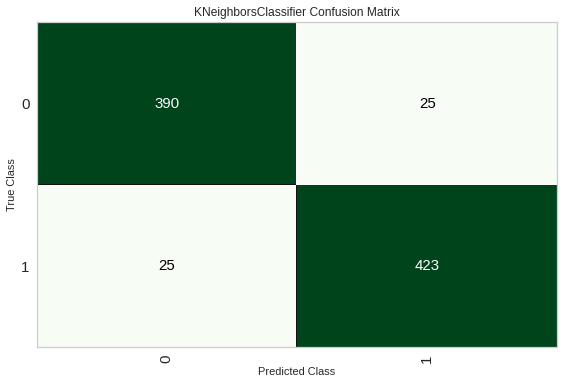

In [60]:
plot_model(tuned_knn, plot = 'confusion_matrix')

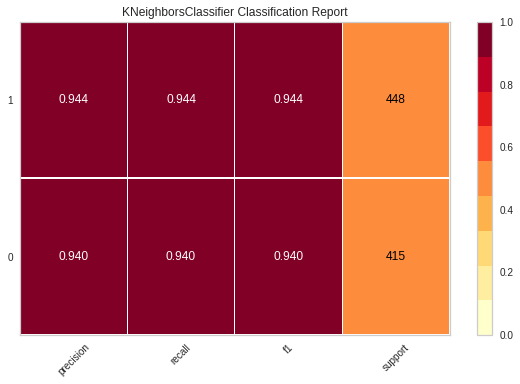

In [61]:
plot_model(tuned_knn, plot = 'class_report')

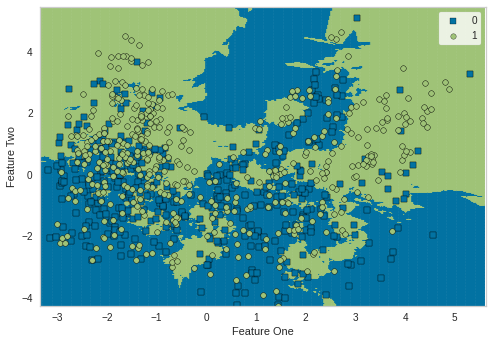

In [62]:
plot_model(tuned_knn, plot='boundary')

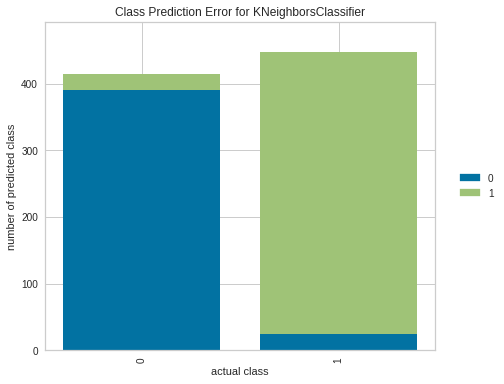

In [63]:
plot_model(tuned_knn, plot = 'error')

In [73]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [65]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9421,0.9837,0.9442,0.9442,0.9442,0.884,0.884


In [66]:
final_knn = finalize_model(tuned_knn)

In [67]:
#Final K Nearest Neighbour parameters for deployment
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')


In [68]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd,hdchk,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class,Label,Score
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,t,f,f,f,t,t,n,won,won,0.8235
1,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won,won,0.7647
2,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,t,f,t,f,f,f,t,f,f,f,f,t,f,f,t,t,n,won,won,0.6471
3,f,f,f,f,t,f,t,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won,won,0.8235
4,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won,won,0.7059


In [69]:
save_model(final_knn,'Final KNN Model 11Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('fix_perfect', Remove_100(target='class')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
          

In [70]:
saved_final_knn = load_model('Final KNN Model 11Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [71]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

In [72]:
new_prediction.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd,hdchk,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class,Label,Score
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,t,f,f,f,t,t,n,won,won,0.8235
1,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won,won,0.7647
2,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,t,f,t,f,f,f,t,f,f,f,f,t,f,f,t,t,n,won,won,0.6471
3,f,f,f,f,t,f,t,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won,won,0.8235
4,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won,won,0.7059
